# __Returns__

_By: Trevor Rowland_ ([@dBCooper2](https://github.com/dBCooper2))

### _References_:

Ruppert, David and David S. Matteson. _Statistics and Data Analysis for Financial Engineering with R examples_. $2^{nd}$ ed., Springer, 2015.

Quantivity. "Why Log Returns?" Quantivity, 21 Feb. 2011, https://quantivity.wordpress.com/2011/02/21/why-log-returns/.

Costan, Julian. "Linear vs. Log Returns." Decentralized Meta-Learning, 14 Sept. 2021, https://blog.costan.ro/post/2021-09-14-linear-log-returns/.



### _Table of Contents_

[Textbook Notes](#textbook-notes)

..[Why Returns?](#why-returns)

..[Net Returns](#net-returns)

..[Gross Returns](#gross-returns)

..[Log Returns](#log-returns)
  
....[Why Log Returns?](#why-log-returns)

..[Adjusting for Dividends](#adjusting-for-dividends)

..[The Random Walk Model](#the-random-walk-model)

..[When to use each type of return](#when-to-use-each-type-of-return)
  
....[Using Net Returns](#using-net-returns)
  
....[Using Log Returns](#using-log-returns)

[Calculating Returns in Python](#calculating-returns-in-python)
  
..[Accessing Stock Data](#accessing-stock-data)
  
....[Defining Net Return Functions](#defining-net-return-functions)
  
....[Defining Log Return Functions](#defining-log-return-functions)
  
....[Calculating Net and Log Returns for the data](#calculating-net-and-log-returns-for-the-data)
  
....[Comparing Net Returns](#comparing-net-returns)
  
....[Visualizing Log Returns](#visualizing-log-returns)

## Textbook Notes:

### ___Why Returns?___

Returns are used instead of raw prices because it _normalizes_ the variables. 

For example, take a portfolio with $100,000 invested in it and a portfolio with $100 invested. The $100,000 portfolio could be posting a gain of $800, but that is worse performance than the $100 portfolio posting a gain of $87. 

Using returns normalizes the data between these two portfolios to show which is actually performing better. The _net returns_ of these portfolios are 0.00793651 and 0.46524064 for the $100,000 and $100 portfolios, respectively.

### __Net Returns__

To find the net returns of an asset at time $t$, the formula is:

$$R_t = \frac{P_t}{P_{t-1}}-1=\frac{P_t-P_{t-1}}{P_{t-1}}$$

where:

$P_t-P_{t-1}$, the numerator, is the revenue or profit over the period, positive is a gain and negative is a loss on the asset

$P_{t-1}$, the denominator, is the initial investment at the start of the period.

### __Gross Returns__

The formula for _gross return_ is:

$$\frac{P_t}{P_{t-1}} = 1 + R_t$$

Gross Returns measure how much the asset is priced relative to the initial investment _over a single period_.

To find the Gross Returns over multiple periods, or the _gross return over the most recent k periods_, use the formula:

$$1+R_t(k) = \frac{P_t}{P_{t-k}} = (\frac{P_t}{P_{t-1}})(\frac{P_{t-1}}{P_{t-2}})...(\frac{P_{t-k+1}}{P_{t-k}})$$

For time $t-k$ to time $t$

Additionally, this gives you the net return over $k$-periods, which is $R_t(k)$

### __Log Returns__

Log returns are a measure of _continuously compounded returns_ and are denoted by $r_t$. The formula for log returns is:

$$r_t = log(1+R_t)=log(\frac{P_t}{P_{t-1}}) = p_t-p_{t-1}$$

Log Returns measure _relative_ return, which is more useful than _absolute_ returns like net and gross returns for longer-term investments. 

Alongside viewing an asset's performance over longer periods of time, relative measures are more useful for  comparing one investment to another.

#### _Why Log Returns?_

Notes from Quantivity's Article _Why Log Returns?_: <https://quantivity.wordpress.com/2011/02/21/why-log-returns/>

Log Returns are approximately equal to net returns when returns are very small, which is common for trades with short holding durations seen in applications like High-Frequency Trading Algorithms.

If we assume log returns are approximately the same as raw returns and can be interpreted similarly, then log returns significantly lowers algorithmic complexity and increases stability of financial models.

This is illustrated below:

##### The raw compound returns of a sequence of $n$ trades

$$(1+R_1)(1+R_2)...(1+R_n) = \prod_{i=1}^{n} (1+r_i)$$

##### The log compound returns of a sequence of $n$ trades

With the identity of logarithms:

$$log(1+r_i) = log(\frac{P_t}{P_{t-1}}) = log(P_t) - log(P_{t-1})$$

The series of raw returns can be converted into:

$$\sum_{i=1}^{n}log(1+R_i) = log(1+R_1) + log(1+R_2) + ... log(1+R_n)$$

Which simplifies into

$$log(P_n) - log(P_0)$$

This reduces the algorithmic complexity of computing the compounded returns of an asset _significantly_, and for sums with moderate to large values of $n$ is very useful.

Additionally, it makes the algorithm safer, as adding small numbers together is much safer than computing a product, because even though the numbers are small, for very large values of $n$ the product can blow up quickly and cause an over/underflow error.

### __Adjusting for Dividends__

The return formulas do not account for dividends, which many mature firms typically have. To adjust gross returns to include dividends, simply add them to the numerator for the net return:

$$1+R_t = \frac{P_t+D_t}{P_{t-1}}$$

for a dividend paid __before__ time $t$.

This makes the net return formula:

$$R_t = \frac{P_t+D_t}{P_{t-1}} - 1$$

and the log return is the log of the net return equation:

$$r_t = log(1 + R_t) = log(\frac{P_t+D_t}{P_{t-1}}) = log(P_t+D_t)-log(P_{t-1})$$

or simply, 

$$r_t= log(P_t+D_t)-log(P_{t-1})$$

This is the log return with dividends __for a single period__. For multiple-period log returns, use the log of the multiple-period gross returns from above:

$$r_t(k) = log[1+R_t(k)] = log(1+R_t) + ... + log(1+R_{t-k+1})$$

$$ = log(\frac{P_t + D_t}{P_{t-1}}) + ... + log(\frac{P_{t-k+1} + D_{t-k+1}}{P_{t-k}})



### __The Random Walk Model__

The random walk hypothesis states that single-period log returns are independent events. This is commonly used to show that stock returns are, for the most part, random and cannot be predicted using historical data. 

For a log return $r_t = log(1+R_t)$:

$$1+R_t(k) = (1+R_t)...(1+R_{t-k+1})$$
$$= e^{r_t}...e^{r_{t-k+1}}$$
$$=e^{r_t + ... + r_{t-k+1}}$$

Where exp(x) := $e^x$

Then, taking the log of both sides returns:

$$log(1+R_t(k)) = r_t + ... + r_{t-k+1}$$

Sometimes log returns are assumed to be normally distributed for a constant mean and variance, or in mathematical terms $N(\mu,\sigma^2)$. Sums of normally distributed random variables are normally distributed, therefore __the normality of single-period log returns implies that multiple-period log returns are also normally distributed__, which means $log\{1+R_t(k)\}$ is $N(k\mu,k\sigma^2)$

### __When to use each type of return__

This isn't from the textbook, but rather from the article ["Linear vs Log Returns"](https://blog.costan.ro/post/2021-09-14-linear-log-returns/) by Julian Costan.

#### _Using Net Returns_

Net Returns are best used when you are comparing results across different assets, for example when you are comparing assets to include in a portfolio.

#### _Using Log Returns_

Log returns are best for returns whose values are close to 0, or for returns on assets held over a short holding period.

Log returns should be also used when data is analyzed over time, especially in algorithms(see the [Why Log Returns](#why-log-returns) section)

## Calculating Returns in Python

Here is a quick example of calculating both net and log returns for a stock, and then comparing these returns using the methodologies applied in [When to use each type of return](#when-to-use-each-type-of-return)

### __Accessing Stock Data__

The data will be pulled from a series of Stock CSVs from a previous project that I have imported here. They are located in docs/semiconductor_csvs/<stock_ticker>/<stock_ticker>_Candles_Monthly.CSV

In [2]:
import pandas as pd

# Store Filenames
adi_monthly_data = '/Users/dB/Documents/repos/github/pythonic-finance/docs/semiconductor_csvs/ADI/ADI_Candles_Monthly.CSV'
amat_monthly_data = '/Users/dB/Documents/repos/github/pythonic-finance/docs/semiconductor_csvs/AMAT/AMAT_Candles_Monthly.CSV'
amd_monthly_data = '/Users/dB/Documents/repos/github/pythonic-finance/docs/semiconductor_csvs/AMD/AMD_Candles_Monthly.CSV'

# Create DataFrames from Candle Data
adi_df = pd.read_csv(adi_monthly_data)
amat_df = pd.read_csv(amat_monthly_data)
amd_df = pd.read_csv(amd_monthly_data)

print(adi_df.head())

# Filter for the Adjusted Closing Price
adi_df = adi_df.filter(items=['Date', 'Adj Close'])
amat_df = amat_df.filter(items=['Date', 'Adj Close'])
amd_df = amd_df.filter(items=['Date', 'Adj Close'])

         Date        Open        High         Low       Close   Adj Close  \
0  2019-02-01   99.169998  108.279999   98.730003  106.959999   97.272667   
1  2019-03-01  107.839996  111.120003  103.300003  105.269997   96.226265   
2  2019-04-01  106.519997  118.540001  106.260002  116.239998  106.253815   
3  2019-05-01  116.559998  117.959999   95.940002   96.620003   88.319389   
4  2019-06-01   97.309998  114.419998   95.510002  112.870003  103.744362   

     Volume  
0  57052200  
1  58506700  
2  52103200  
3  71430500  
4  56130500  


### __Defining Net Return Functions__

To calculate the net returns on the data, we need to use the formula $R_t = \frac{P_t}{P_{t-1}}$ from the [Net Returns](#net-returns) section. In Python, this looks like:

In [3]:
def get_net_return_single_period(price_t, price_t_1):
    return (price_t / price_t_1)

And operating over a pandas DataFrame:

In [4]:
def get_net_returns(df: pd.DataFrame, col_name: str, num_periods: int):
    df['Net_Return']= df[col_name].pct_change(periods=num_periods)
    return df

### __Defining Log Return Functions__

To calculate log returns, remember the formula is: 

$$r_t = log(1+R_t)=log(\frac{P_t}{P_{t-1}}) = p_t-p_{t-1}$$

In Python, this looks like:

In [5]:
import numpy as np

In [6]:
def get_log_returns_single_period(price_t, price_t_1):
    return np.log(price_t/price_t_1)

and for a pandas DataFrame:

In [7]:
def get_log_returns(df: pd.DataFrame, col_name: str, num_periods: int)->pd.DataFrame:
    df['Log_Return'] = np.log(df[col_name] / df[col_name].shift(periods=num_periods))
    return df

### __Calculating Net and Log Returns for the Data__

Now that the functions are defined, it's time to calculate the net and log returns for each DataFrame:

In [8]:
adi_df = get_net_returns(adi_df, 'Adj Close', 1)
amat_df = get_net_returns(amat_df, 'Adj Close', 1)
amd_df = get_net_returns(amd_df, 'Adj Close', 1)

adi_df = get_log_returns(adi_df, 'Adj Close', 1)
amat_df = get_log_returns(amat_df, 'Adj Close', 1)
amd_df = get_log_returns(amd_df, 'Adj Close', 1)

Here is the output:

In [9]:
adi_df.head()

,Date,Adj Close,Net_Return,Log_Return
0,2019-02-01,97.272667,NaN,NaN
1,2019-03-01,96.226265,-0.010757,-0.010816
2,2019-04-01,106.253815,0.104208,0.099128
3,2019-05-01,88.319389,-0.168789,-0.184871
4,2019-06-01,103.744362,0.174650,0.160970


In [10]:
amat_df.head()

,Date,Adj Close,Net_Return,Log_Return
0,2019-02-01,36.212162,NaN,NaN
1,2019-03-01,37.650509,0.039720,0.038951
2,2019-04-01,41.837059,0.111195,0.105436
3,2019-05-01,36.729649,-0.122079,-0.130198
4,2019-06-01,42.852547,0.166702,0.154181


In [11]:
amd_df.head()

,Date,Adj Close,Net_Return,Log_Return
0,2019-02-01,23.530001,NaN,NaN
1,2019-03-01,25.520000,0.084573,0.081186
2,2019-04-01,27.629999,0.082680,0.079440
3,2019-05-01,27.410000,-0.007962,-0.007994
4,2019-06-01,30.370001,0.107990,0.102547


### __Comparing Net Returns__

Net Returns are used to calculate performance across different assets, so the returns for each access will be calculated as a box plot and graphed using seaborn:

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
sns.set_theme(style="darkgrid")

Creating the DataFrame with the Net Return Data for each asset:

In [13]:
# Create a DataFrame of each of the symbol's net returns
net_return_df = pd.DataFrame()
net_return_df['ADI'] = adi_df['Net_Return']
net_return_df['AMAT'] = amat_df['Net_Return']
net_return_df['AMD'] = amd_df['Net_Return']

# Drop the NaN values in the DataFrame
net_return_df = net_return_df.dropna()

# Melt the DataFrame from 3 Net Return Columns into 1 for the Box Plotter to work
net_return_df_melted = net_return_df.melt(var_name='Symbol', value_name='Net Return')

Boxplots of the Stock Data:

Text(0.5, 1.0, 'Net Returns of Semiconductor Stocks - Monthly Price Data(2019-2024)')

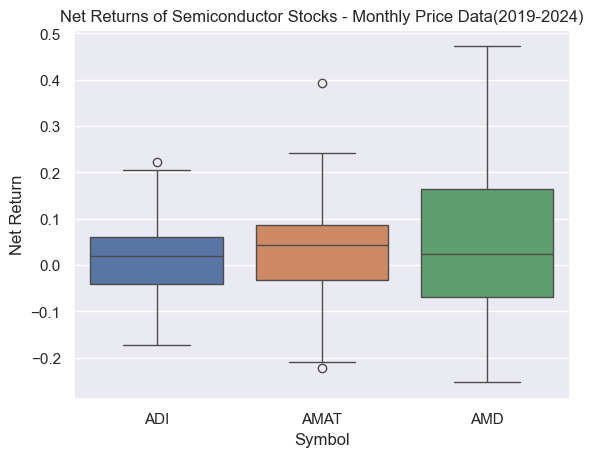

In [14]:
plot = sns.boxplot(x='Symbol', y ='Net Return', hue='Symbol', data=net_return_df_melted)
plot.set_title('Net Returns of Semiconductor Stocks - Monthly Price Data(2019-2024)')

From this boxplot the 5-number summary of each stock is visualized. According to the rules for using net returns outlined in [When to use each type of return](#when-to-use-each-type-of-return), this is the most accurate comparison of the data, and log returns would skew these values slightly.

### __Visualizing Log Returns__

To analyse the log returns, it is best practice to view the log returns over time. Creating a Time Series of each stock's data should be a good representation of each stock's return.

#### _Creating the Time series:_

__ADI Log Returns Time Series:__

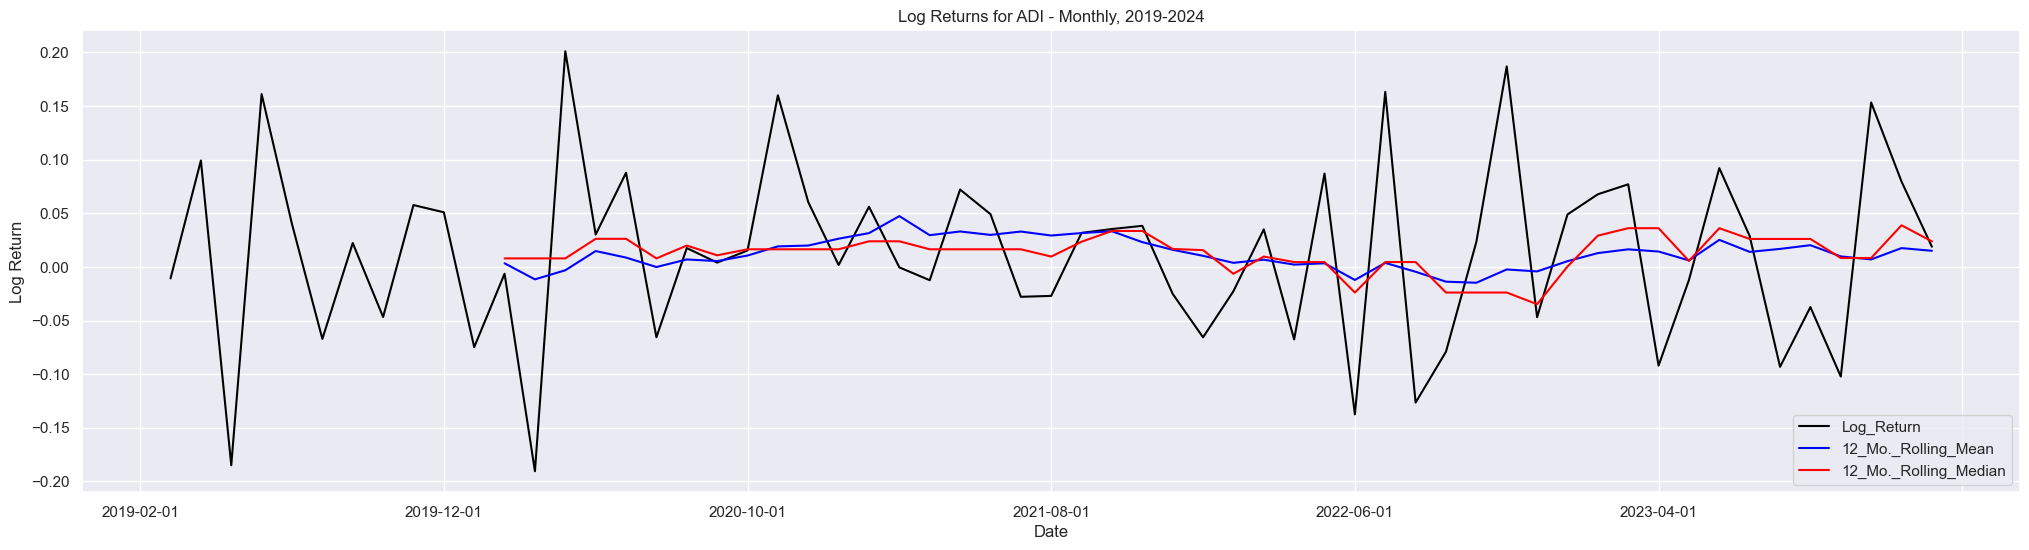

In [33]:
adi_df.set_index(adi_df['Date'], inplace=True)

fig, ax = plt.subplots(figsize = (25,6))
plt.xticks(rotation=45)

adi_df['12_Mo._Rolling_Mean'] = adi_df['Log_Return'].rolling(12).mean()
adi_df['12_Mo._Rolling_Median'] = adi_df['Log_Return'].rolling(12).median()

adi_df[['Log_Return', '12_Mo._Rolling_Mean', '12_Mo._Rolling_Median']].plot(ax=ax, color=['black', 'blue', 'red'])

ax.set_xlabel('Date')
ax.set_ylabel('Log Return')
ax.set_title('Log Returns for ADI - Monthly, 2019-2024')

plt.show()

__AMAT Log Returns Time Series:__

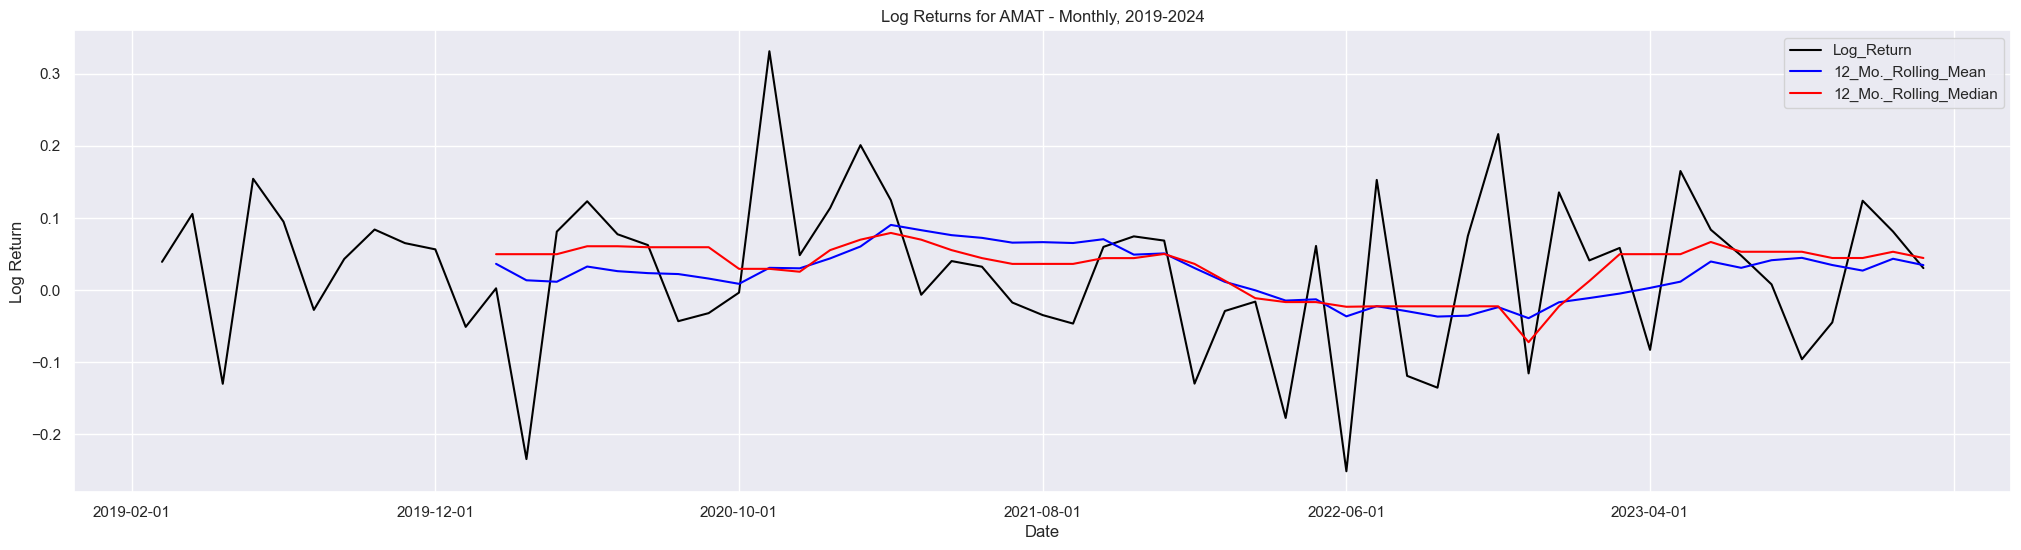

In [32]:
amat_df.set_index(amat_df['Date'], inplace=True)

fig, ax = plt.subplots(figsize = (25,6))
plt.xticks(rotation=45)

amat_df['12_Mo._Rolling_Mean'] = amat_df['Log_Return'].rolling(12).mean()
amat_df['12_Mo._Rolling_Median'] = amat_df['Log_Return'].rolling(12).median()

amat_df[['Log_Return', '12_Mo._Rolling_Mean', '12_Mo._Rolling_Median']].plot(ax=ax, color=['black', 'blue', 'red'])

ax.set_xlabel('Date')
ax.set_ylabel('Log Return')
ax.set_title('Log Returns for AMAT - Monthly, 2019-2024')

plt.show()

__AMD Log Return Time Series:__

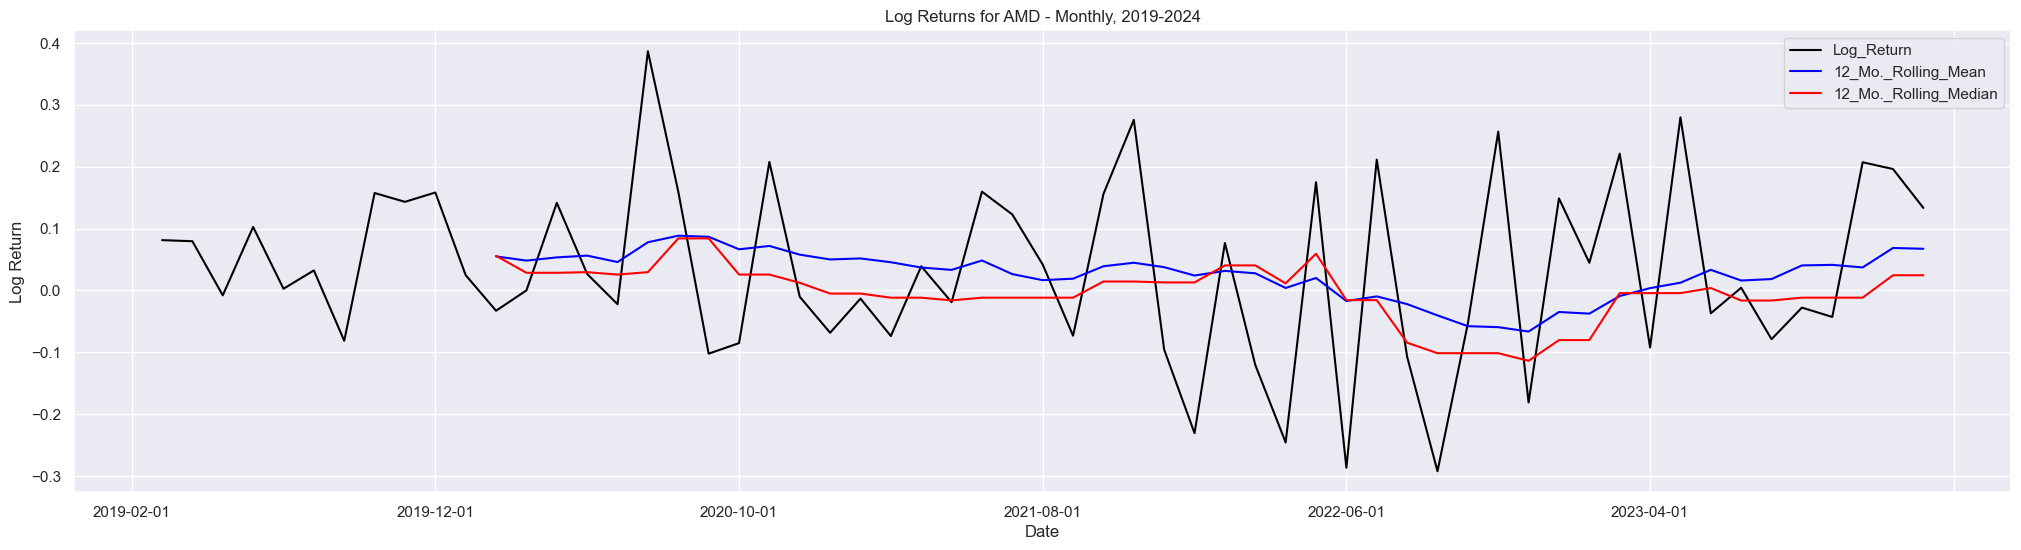

In [30]:
amd_df.set_index(amd_df['Date'], inplace=True)

fig, ax = plt.subplots(figsize = (25,6))
plt.xticks(rotation=45)

amd_df['12_Mo._Rolling_Mean'] = amd_df['Log_Return'].rolling(12).mean()
amd_df['12_Mo._Rolling_Median'] = amd_df['Log_Return'].rolling(12).median()

amd_df[['Log_Return', '12_Mo._Rolling_Mean', '12_Mo._Rolling_Median']].plot(ax=ax, color=['black', 'blue', 'red'])

ax.set_xlabel('Date')
ax.set_ylabel('Log Return')
ax.set_title('Log Returns for AMD - Monthly, 2019-2024')

plt.show()

After graphing each of the time series, a trend appears where each stock fluctuates wildly, but their returns all have a 'level' that they fluctuate around but never deviate wildly from, with the AMAT graph appearing to begin and end at the same y-value. This 'level' that the stocks fluctuate around can be seen in the 12 month rolling means and medians added to the time series

This is mentioned in the _Statistics and Data Analysis for Financial Engineering_ textbook, and will be explored further in the Time Series section of this repository.